In [1]:
import os
HOME = os.getcwd()
print(HOME)

/Car_Accident


In [2]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.2.0 CUDA:0 (NVIDIA GeForce RTX 3090 Ti, 24248MiB)
Setup complete ✅ (72 CPUs, 125.8 GB RAM, 11.1/128.0 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key="Yn1KtLKQ2y6l7nw7qrQB")
project = rf.workspace("accidentfinal").project("aws-iuarg")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [5]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=800 plots=True

New https://pypi.org/project/ultralytics/8.2.38 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.2.0 CUDA:0 (NVIDIA GeForce RTX 3090 Ti, 24248MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/Car_Accident/AwS-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, au

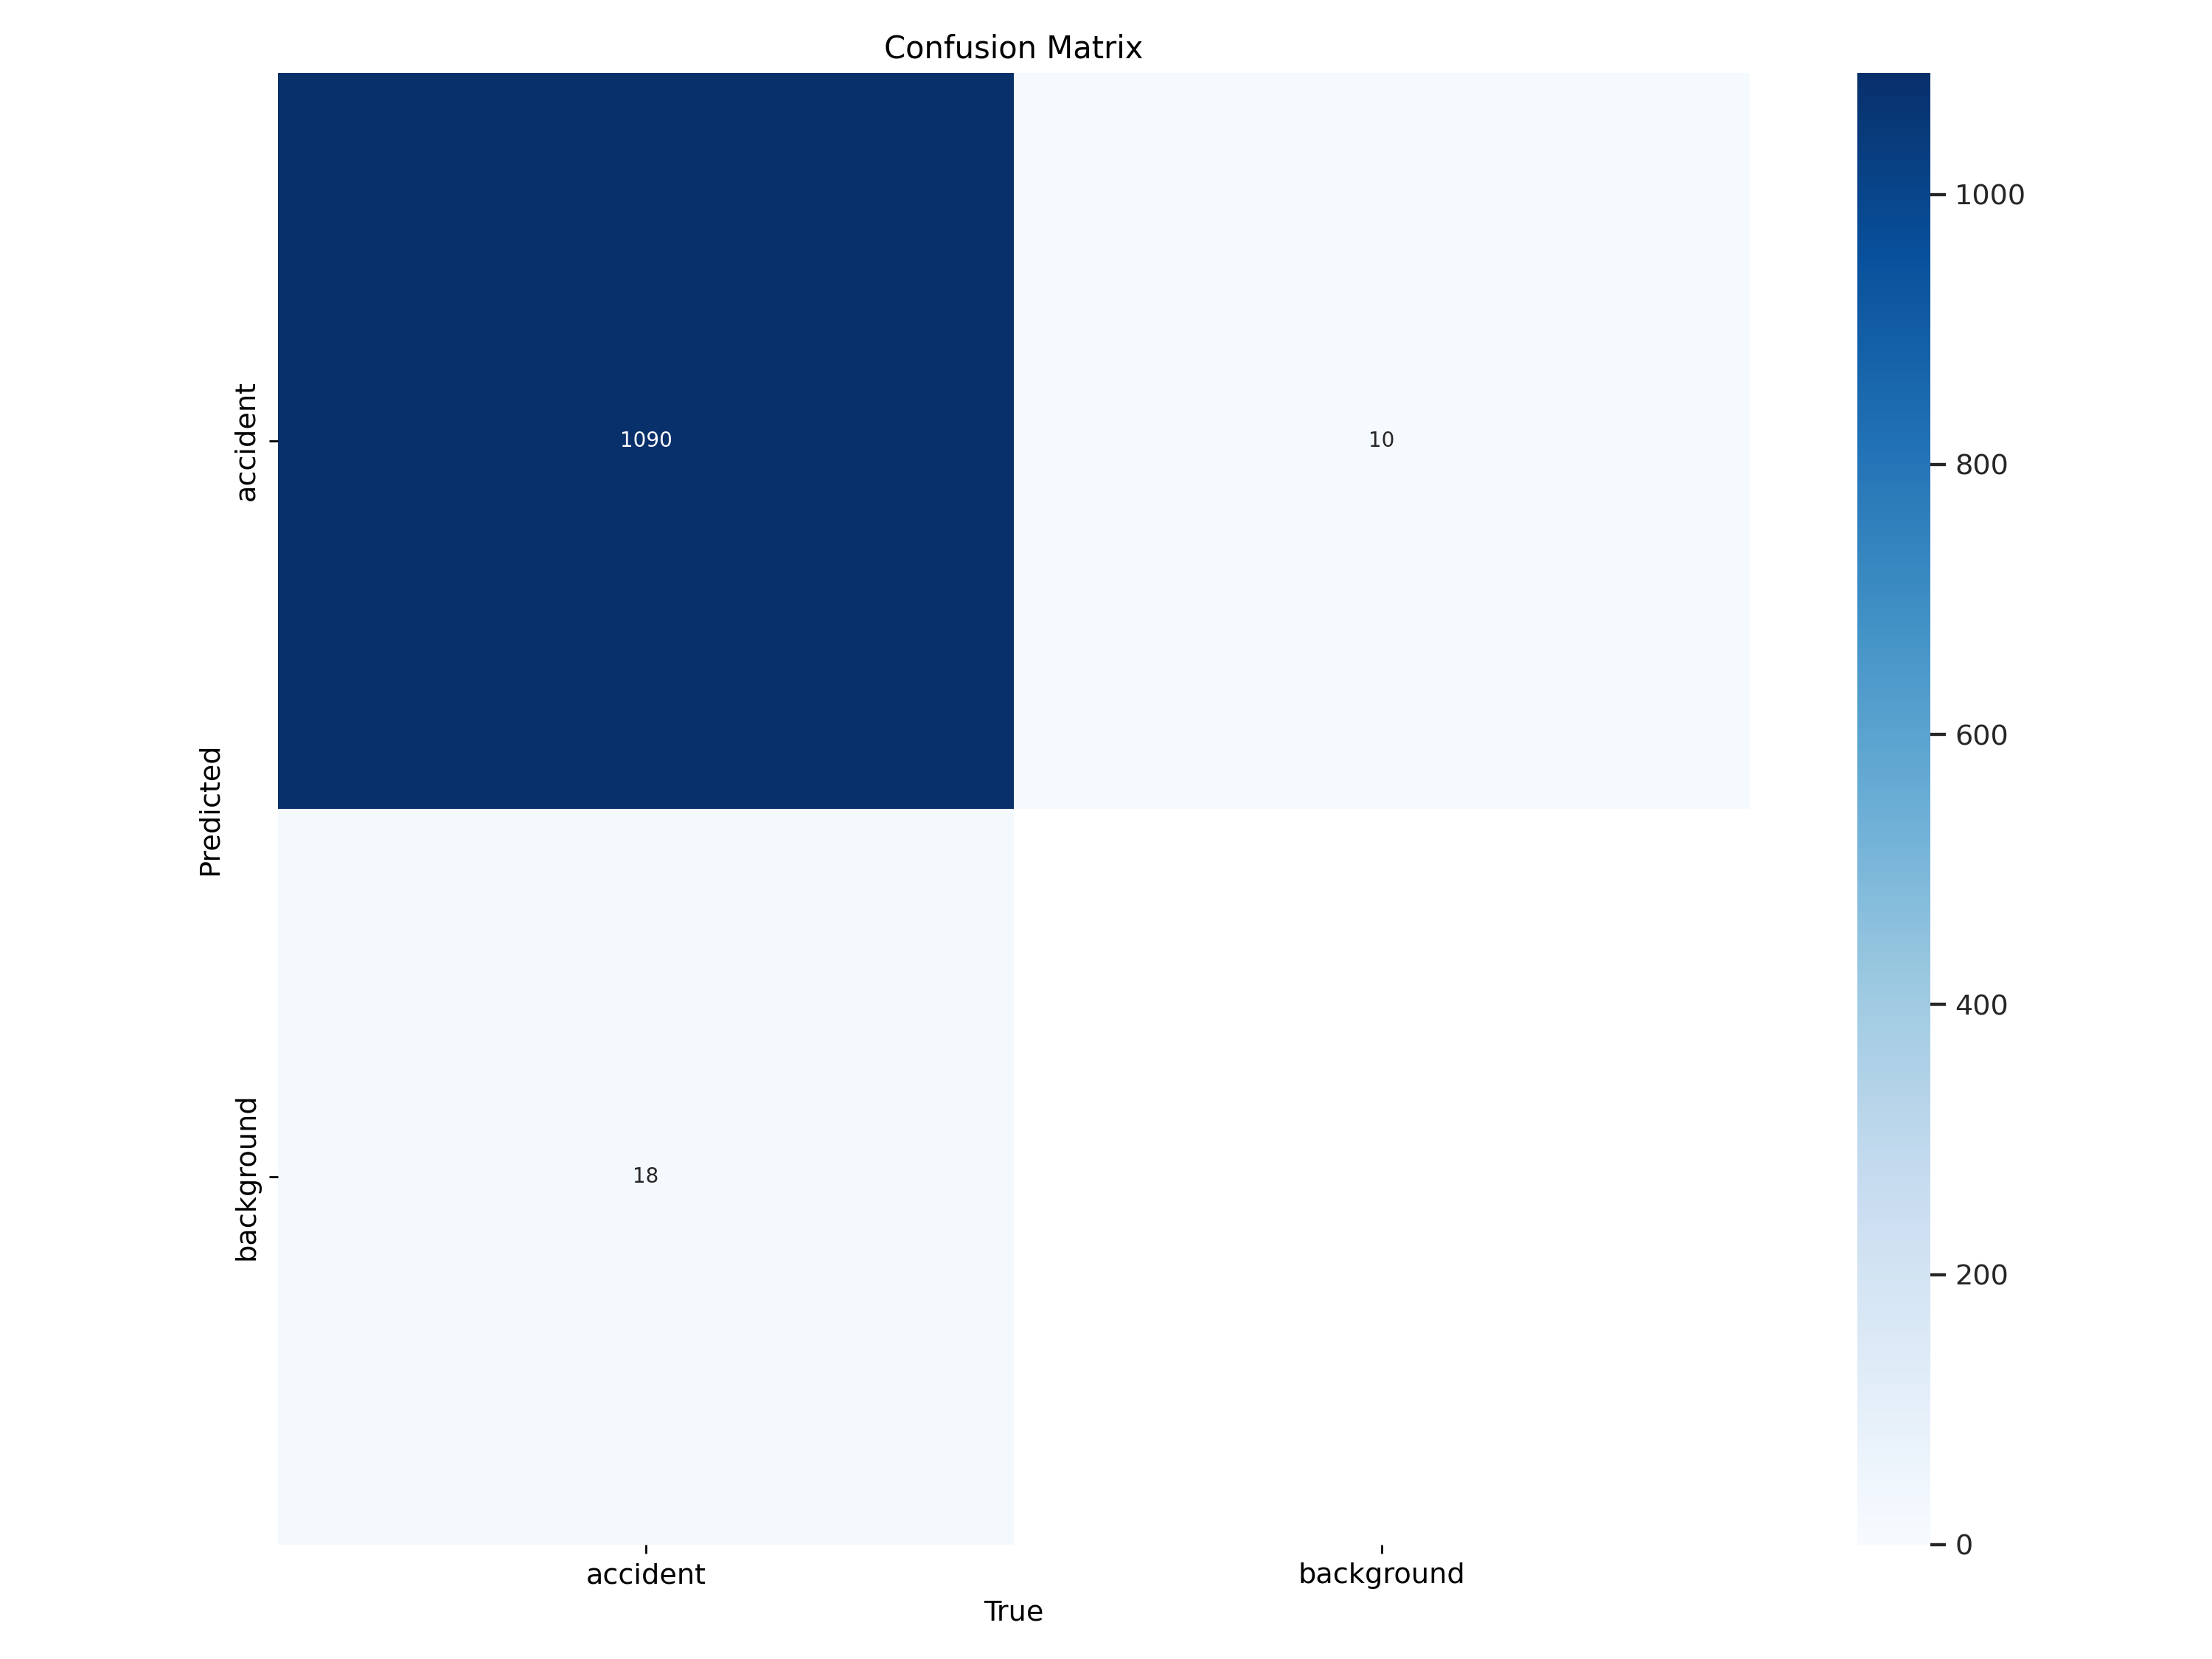

In [6]:
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

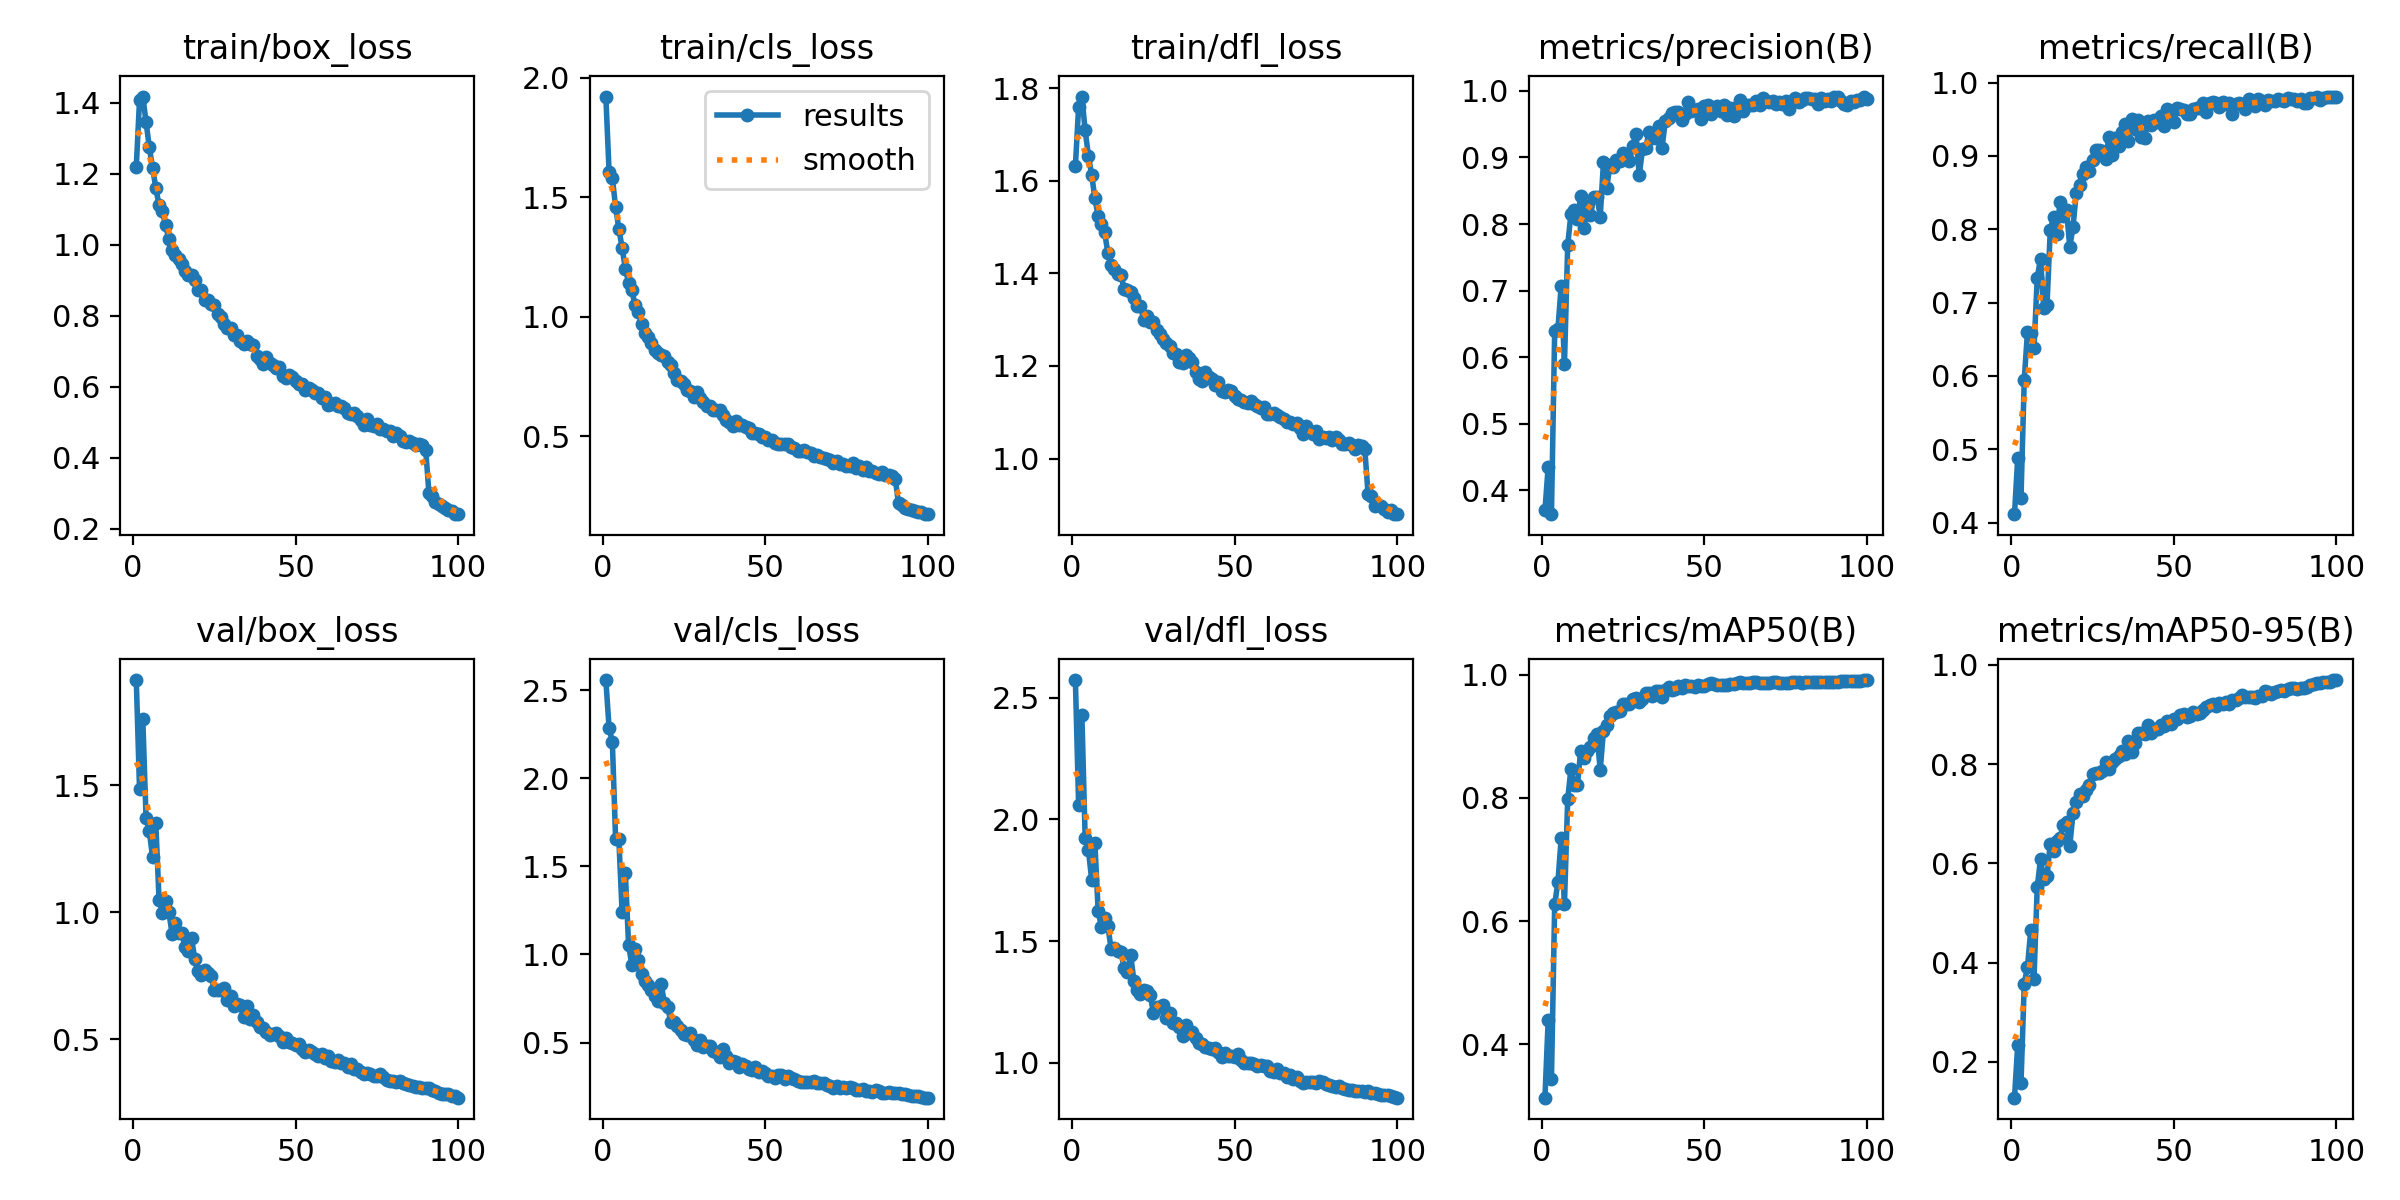

In [7]:
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

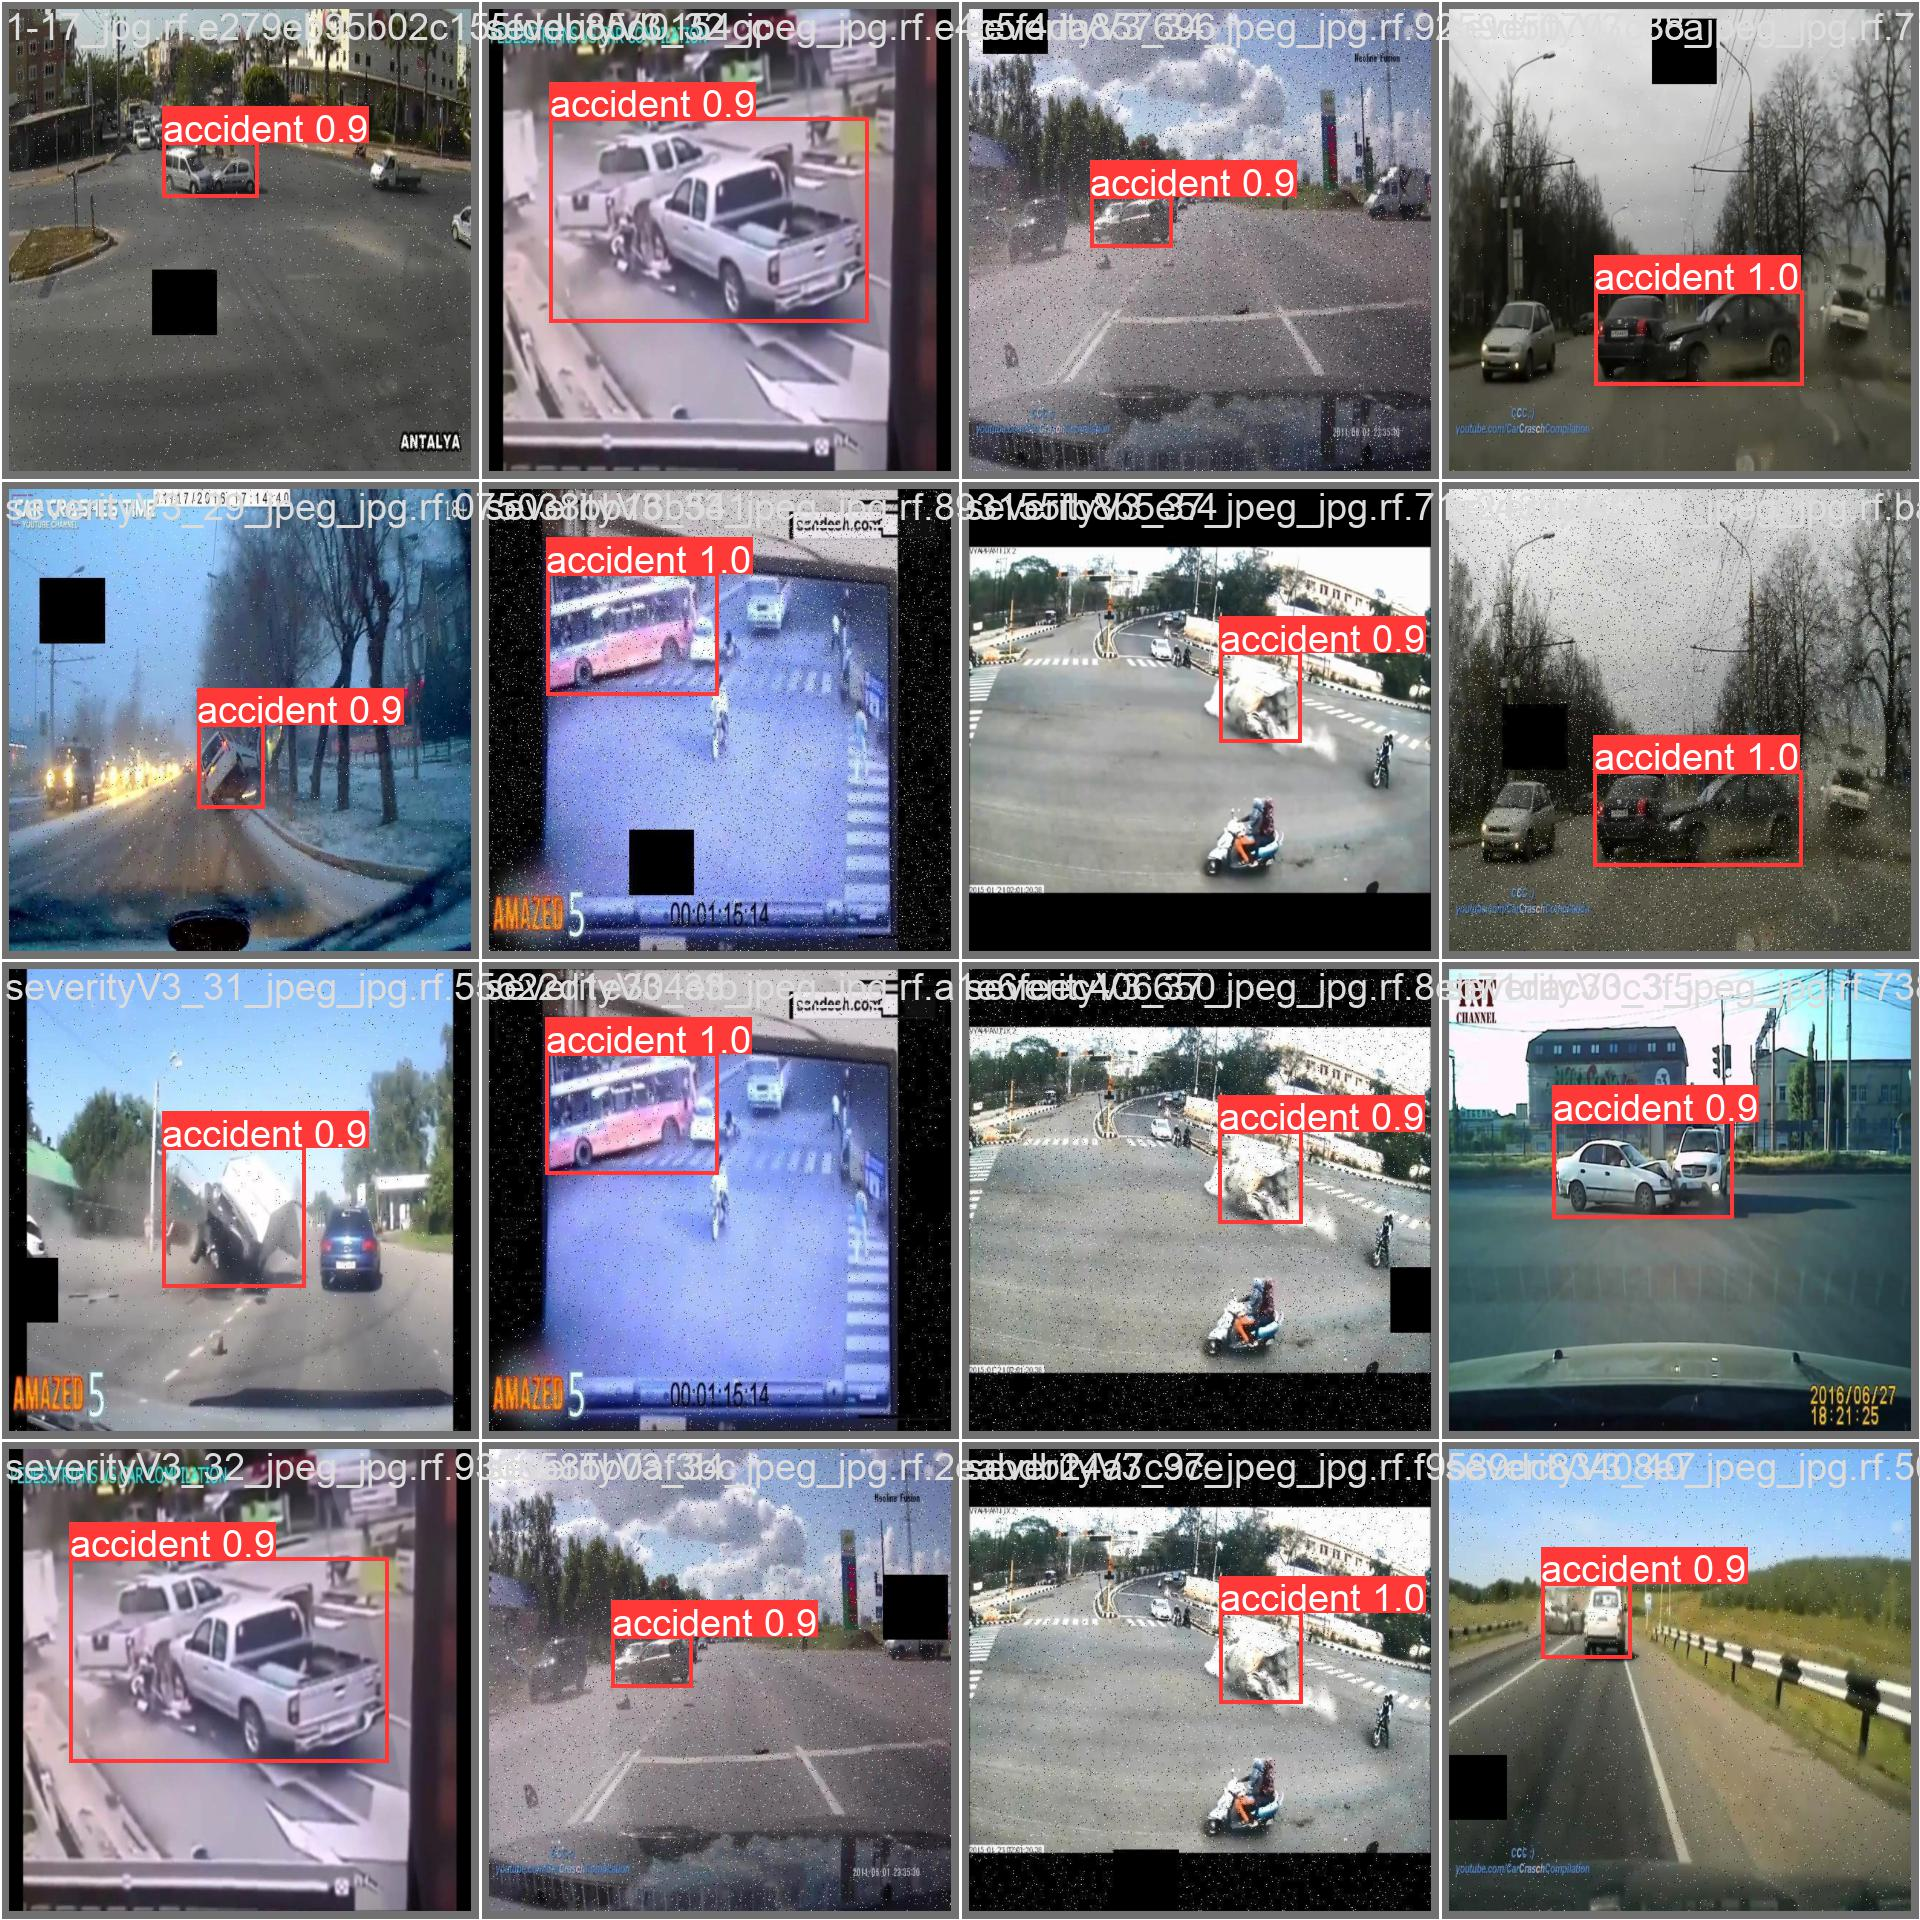

In [8]:
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [9]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.2.0 CUDA:0 (NVIDIA GeForce RTX 3090 Ti, 24248MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /Car_Accident/AwS-1/valid/labels.cache... 1060 images, 0 backgroun
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1060       1108      0.988      0.981      0.991      0.969
Speed: 0.5ms preprocess, 3.5ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [10]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.2.0 CUDA:0 (NVIDIA GeForce RTX 3090 Ti, 24248MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/529 /Car_Accident/AwS-1/test/images/10-31_jpg.rf.30cb9724165f86c1b92bb72c7ff3d11a.jpg: 800x800 2 accidents, 9.8ms
image 2/529 /Car_Accident/AwS-1/test/images/10-74_jpg.rf.7be577773ca97c2085dc876820f0707c.jpg: 800x800 2 accidents, 10.1ms
image 3/529 /Car_Accident/AwS-1/test/images/10-79_jpg.rf.d65211268488de1dbfc74f910052a2c4.jpg: 800x800 2 accidents, 8.9ms
image 4/529 /Car_Accident/AwS-1/test/images/1003_jpeg_jpg.rf.cd079ce49adab8c3f2a19313304a618f.jpg: 800x800 1 accident, 8.6ms
image 5/529 /Car_Accident/AwS-1/test/images/1072_jpeg_jpg.rf.0f559775bb79d537a7f3c8255fc36445.jpg: 800x800 1 accident, 8.7ms
image 6/529 /Car_Accident/AwS-1/test/images/1072_jpeg_jpg.rf.32762d6e62c1ae218b49d4bf1c292749.jpg: 800x800 1 accident, 8.7ms
image 7/529 /Car_Accident/AwS-1/test/images/1072_jpeg_jpg.rf.e21f824080b2175

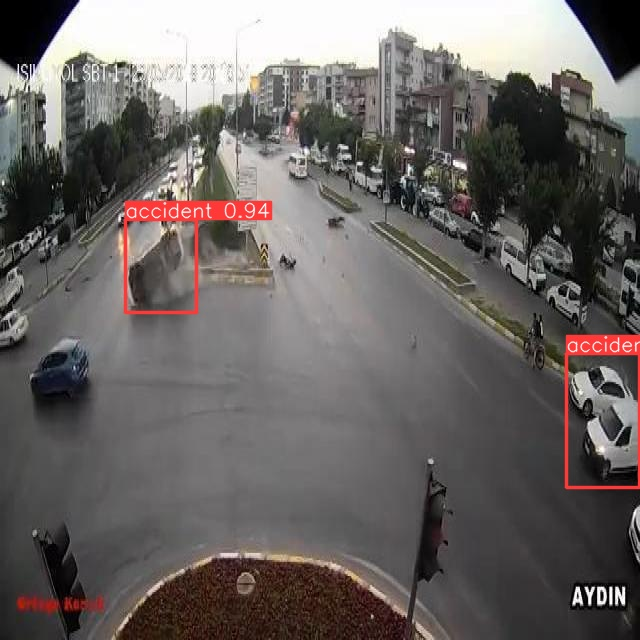

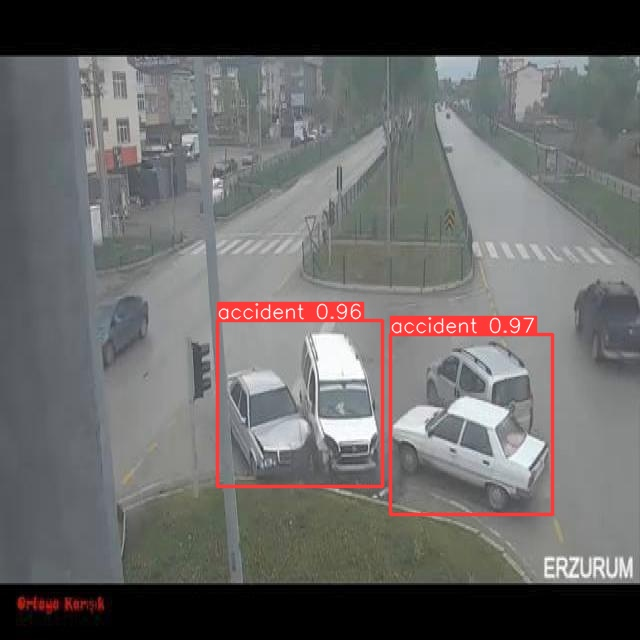

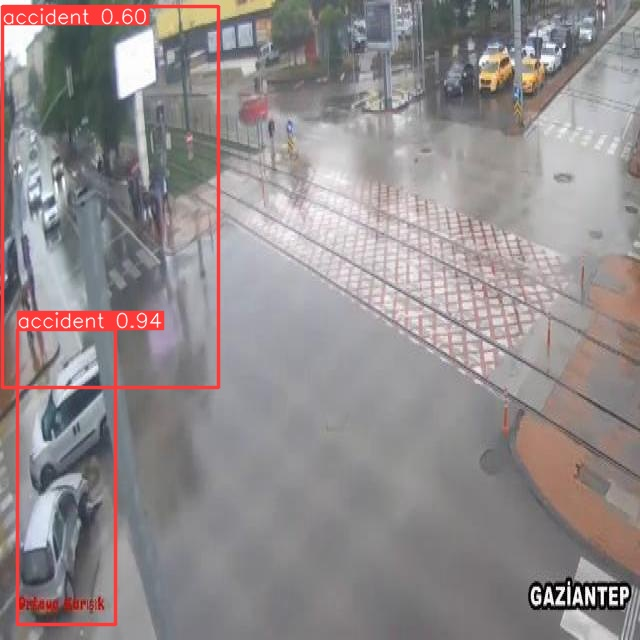

In [11]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")